In [6]:
import pandas as pd

# Завдання 1

In [7]:
df = pd.read_csv("bikes_rent.csv")
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


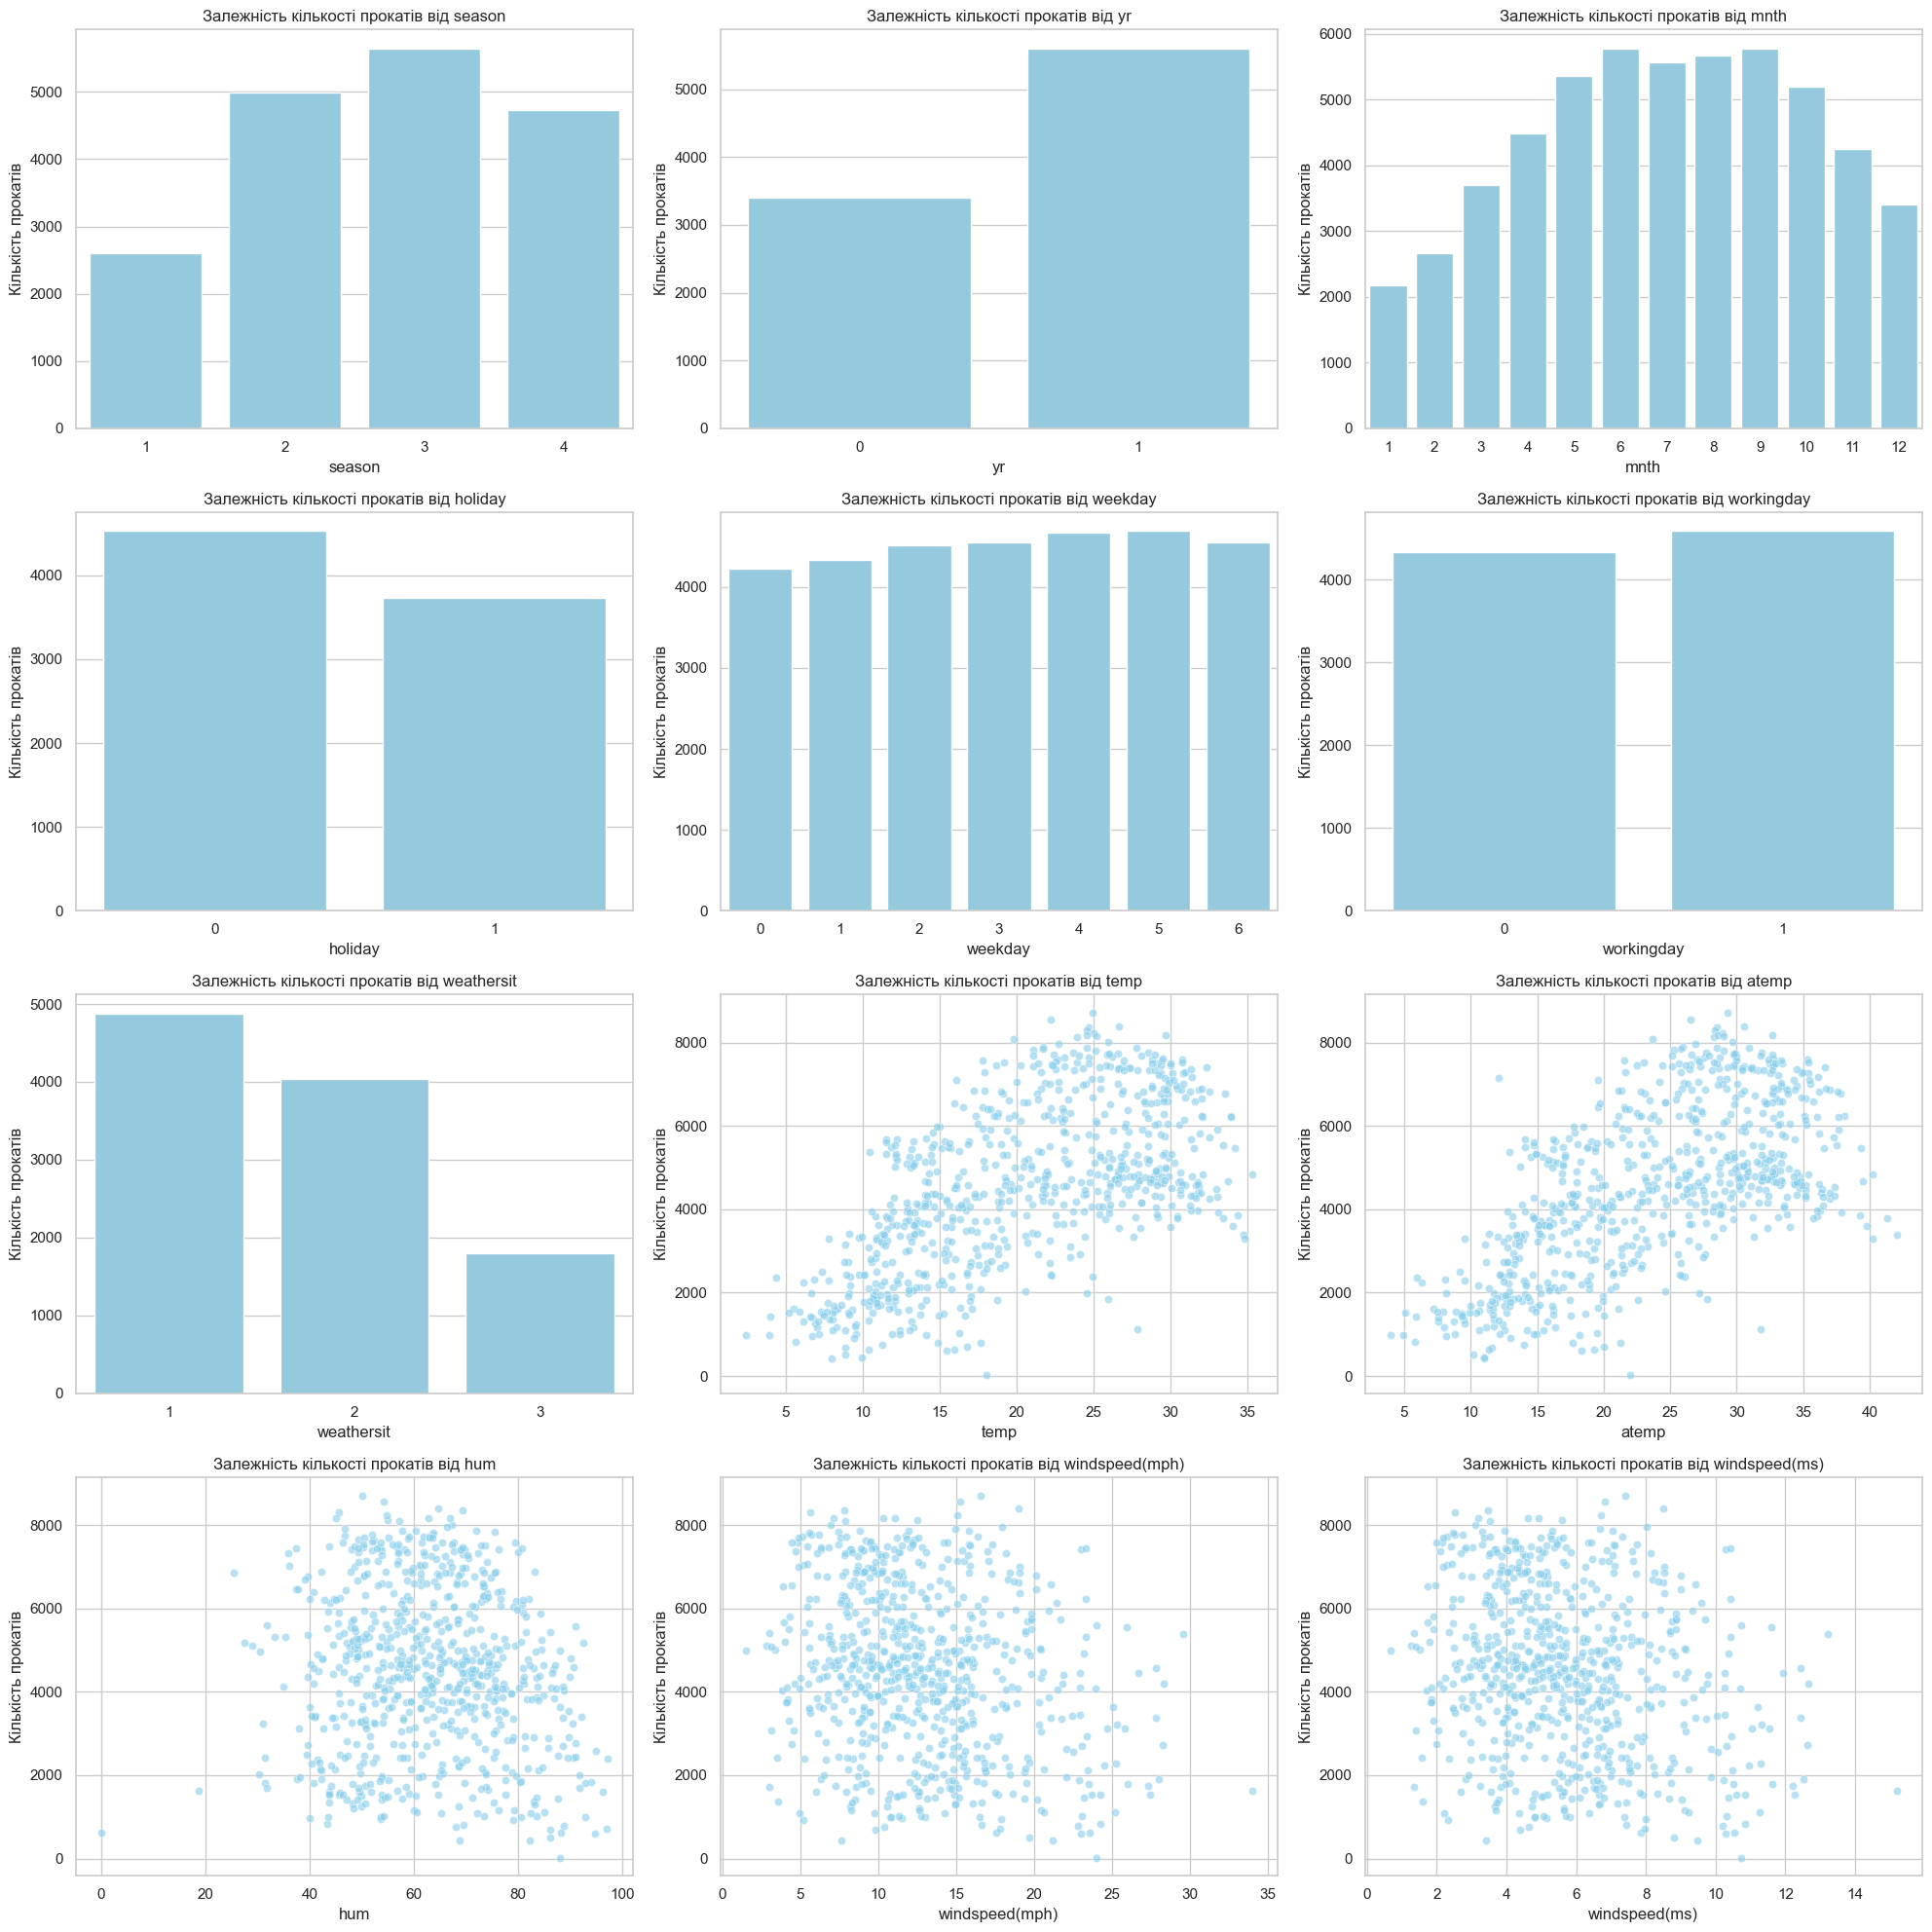

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

attributes = ["season", "yr", "mnth", "holiday", "weekday", "workingday", 
              "weathersit", "temp", "atemp", "hum", "windspeed(mph)", "windspeed(ms)"]

sns.set(style="whitegrid")
plt.figure(figsize=(20, 20))

for i, feature in enumerate(attributes, start=1):
    plt.subplot(4, 3, i)
    if feature == 'temp' or feature == 'atemp' or feature == 'hum' or feature == 'windspeed(mph)' or feature == 'windspeed(ms)':
        sns.scatterplot(data=df, x=feature, y="cnt", alpha=0.6, color="skyblue")
    else:
        sns.barplot(data=df, x=feature, y="cnt",  errorbar=None, color="skyblue")    
    plt.title(f"Залежність кількості прокатів від {feature}")
    plt.xlabel(feature)
    plt.ylabel("Кількість прокатів")

# Налаштування макета
plt.tight_layout()
plt.show()

### Запитання:
1)Яким є характер залежності кількості прокатів від місяця?  
Кількість прокатів є більшою влітку та поступово зменьшується в зимові.


2)Вкажіть одну або дві ознаки, від яких кількість прокатів скоріше за все залежить лінійно.  
Залежність temp та atemp від cnt.

# Завдання 2

In [9]:
df[attributes].corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms)
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,-0.229046
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,-0.011817
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,-0.207502
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.006292
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.014282
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.018796
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,0.039511
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,-0.157944
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,-0.183643
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.248489


In [10]:
df[attributes].corrwith(df['cnt'])

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64

# Завдання 3

In [11]:
some_attributes = ['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']
correlations = df[some_attributes].corr()
correlations

,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
temp,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659
windspeed(mph),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
windspeed(ms),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,-0.234545,1.000000


# Завдання 4

In [12]:
df.mean()

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64

In [13]:
from sklearn.preprocessing import scale 
from sklearn.utils import shuffle

In [14]:
df_shuffled = shuffle(df, random_state=42)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

In [15]:
from sklearn.linear_model import LinearRegression

# Завдання 5

In [16]:
regressor = LinearRegression()
regressor.fit(X, y)

weights = zip(df.columns, regressor.coef_)
for feature, weight in weights:
    print(f"{feature}: {weight:.4f}")

season: 570.8628
yr: 1021.9691
mnth: -141.3012
holiday: -86.7543
weekday: 137.2229
workingday: 56.3946
weathersit: -330.2260
temp: 367.4695
atemp: 585.5622
hum: -145.6152
windspeed(mph): 12455326676309.8145
windspeed(ms): -12455326676508.2812


# Завдання 6

In [17]:
from sklearn.linear_model import Ridge, Lasso

In [18]:
lasso_regressor = Lasso()
lasso_regressor.fit(X, y)

lasso_weights = zip(df.columns, lasso_regressor.coef_)
for feature, weight in lasso_weights:
    print(f"{feature}: {weight}")

season: 560.2416160308863
yr: 1019.4634940657199
mnth: -128.73062703678704
holiday: -86.15278133371127
weekday: 137.34789390496348
workingday: 55.21237064135647
weathersit: -332.3698569623486
temp: 376.3632362096952
atemp: 576.5307935045544
hum: -144.12915500348583
windspeed(mph): -197.13968940248475
windspeed(ms): -2.8050939793796908e-08


In [19]:
ridge_regressor = Ridge()
ridge_regressor.fit(X, y)

ridge_weights = zip(df.columns, ridge_regressor.coef_)
for feature, weight in ridge_weights:
    print(f"{feature}: {weight}")

season: 563.0645722520181
yr: 1018.9483787875306
mnth: -131.87332028247718
holiday: -86.7460979970923
weekday: 138.00511117871923
workingday: 55.90311037506468
weathersit: -332.34978849907384
temp: 386.457889191908
atemp: 566.347047060067
hum: -145.07132729867186
windspeed(mph): -99.25944108178007
windspeed(ms): -99.2594411543523


# Завдання 7

In [20]:
import numpy as np

In [21]:
alphas = np.arange(1, 500, 50)

coefs_lasso = []
coefs_ridge = []

for alpha in alphas:
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X, y)
    coefs_lasso.append(lasso_regressor.coef_)

    ridge_regressor = Ridge(alpha=alpha)
    ridge_regressor.fit(X, y)
    coefs_ridge.append(ridge_regressor.coef_)

coefs_lasso = np.array(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)
coefs_lasso, coefs_ridge

(array([[ 5.60241616e+02,  1.01946349e+03, -1.28730627e+02,
         -8.61527813e+01,  1.37347894e+02,  5.52123706e+01,
         -3.32369857e+02,  3.76363236e+02,  5.76530794e+02,
         -1.44129155e+02, -1.97139689e+02, -2.80509398e-08],
        [ 4.10969632e+02,  9.77019409e+02, -0.00000000e+00,
         -5.34489688e+01,  9.19434374e+01,  1.75372118e+01,
         -3.18125568e+02,  3.22829934e+02,  6.10031512e+02,
         -9.10689615e+01, -1.45066095e+02, -2.29891296e-08],
        [ 3.70077089e+02,  9.35945490e+02,  0.00000000e+00,
         -1.21619360e+01,  4.88886342e+01,  0.00000000e+00,
         -3.08805664e+02,  2.69417263e+02,  6.32502623e+02,
         -2.75042876e+01, -9.37749037e+01, -2.41650976e-08],
        [ 3.32835717e+02,  8.91870058e+02,  0.00000000e+00,
         -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -2.79616688e+02,  2.11052030e+02,  6.62920880e+02,
         -0.00000000e+00, -5.01551472e+01, -2.62790867e-08],
        [ 2.98134448e+02,  8.4565285

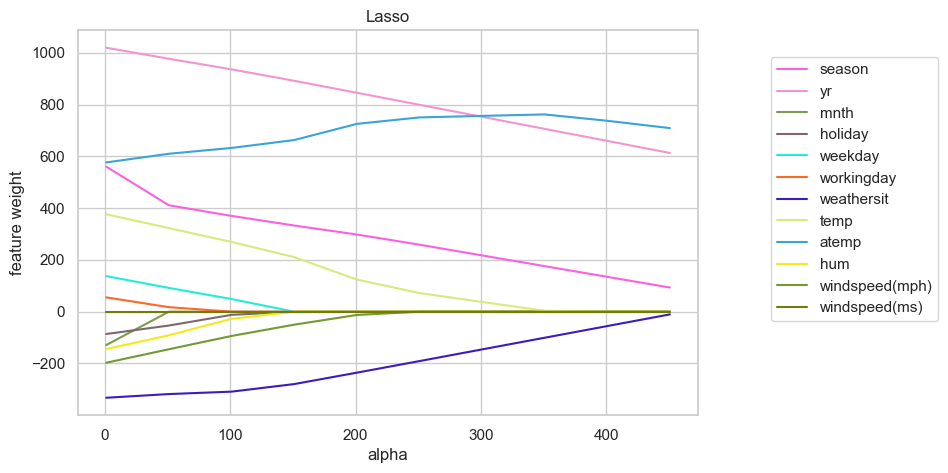

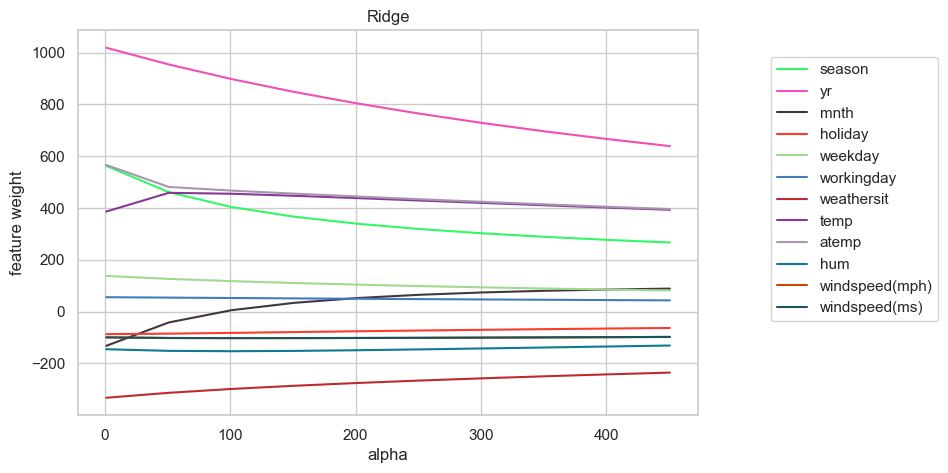

In [22]:
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

### Відповіді
1.Який регуляризатор (Ridge або Lasso) агресивніше зменшує ваги при одному й тому самому alpha?  
*Lasso.*  

2.Що станеться з вагами Lasso, якщо alpha зробити дуже великим? Поясніть, чому так відбувається.  
*Якщо alpha стає дуже великим, то регуляризатор Lasso занулить багато ваг і залишити лише найбільш значущі ознаки.*

3.Чи можна стверджувати, що Lasso виключає одну з ознак windspeed при будь-якому значенні alpha > 0? А Ridge? Вважається, що регуляризатор виключає ознаку, якщо коефіцієнт при ньому менший  10−3 .  
*Так, можна стверджувати, що Lasso виключає одну з ознак windspeed при будь-якому значенні alpha > 0, бо використовує L1-регуляризацію, що може обнулити коефіцієнт при змінній, якщо її внесок у модель є незначним. Ні, не можна стверджувати, що Ridge виключає одну з ознак windspeed при будь-якому значенні alpha > 0, бо Ridge не виключає ознаки, а лише зменшує їх ваги.*

4.Який із регуляризаторів підійде для відбору неінформативних ознак?  
*Lasso є кращим варіантом для відбору неінформативних ознак, оскільки Lasso обнуляє коефіцієнти для деяких змінних.*

# Завдання 8

In [37]:
def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    x, y = zip(*data)
    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()

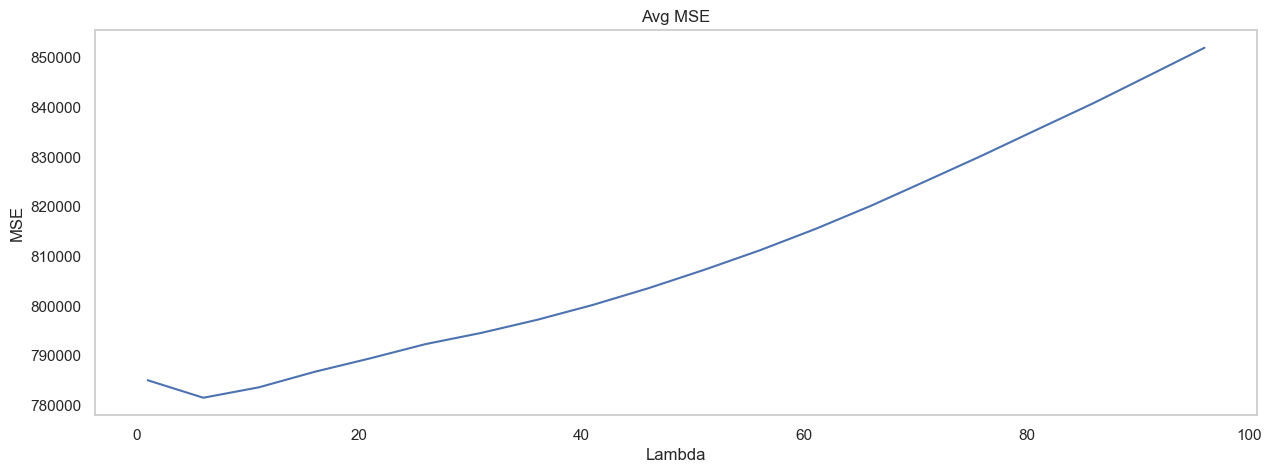

Кращий alpha: 6
Ваги для кращого alpha: [ 5.32018983e+02  1.01506022e+03 -1.00039526e+02 -8.32939599e+01
  1.32504465e+02  5.15570856e+01 -3.30559857e+02  3.70679855e+02
  5.81396931e+02 -1.40007406e+02 -1.91771408e+02 -2.68551365e-08]


In [39]:
from sklearn.linear_model import LassoCV

alphas = np.arange(1, 100, 5)

regressor = LassoCV(alphas=alphas, cv=3)
regressor.fit(X, y)

mean_mse = np.mean(regressor.mse_path_, axis=1)
data = list(zip(regressor.alphas_, mean_mse))
create_plot(data, title="Avg MSE", xlabel='Lambda', ylabel='MSE')

print("Кращий alpha:", regressor.alpha_)
print("Ваги для кращого alpha:", regressor.coef_)

# Завдання 9

Alphas with minimum MSE:
Alpha = 6, MSE = 733725.7604052249
Alpha = 1, MSE = 799433.1673691692
Alpha = 51, MSE = 796979.8955193626


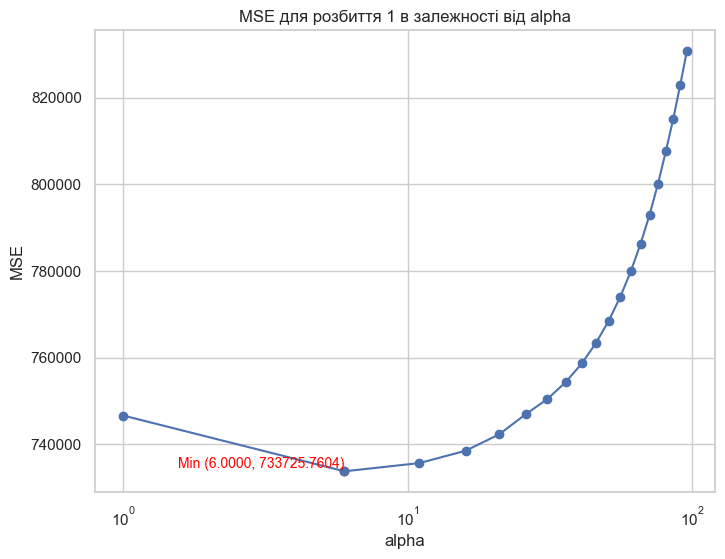

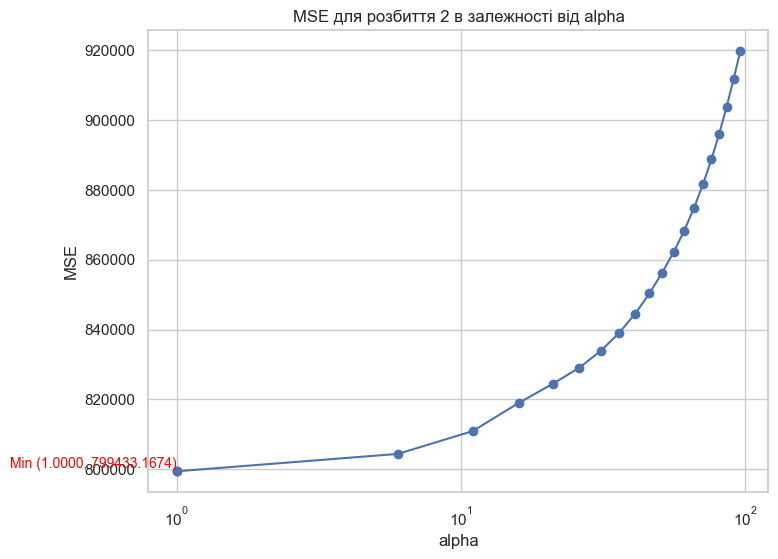

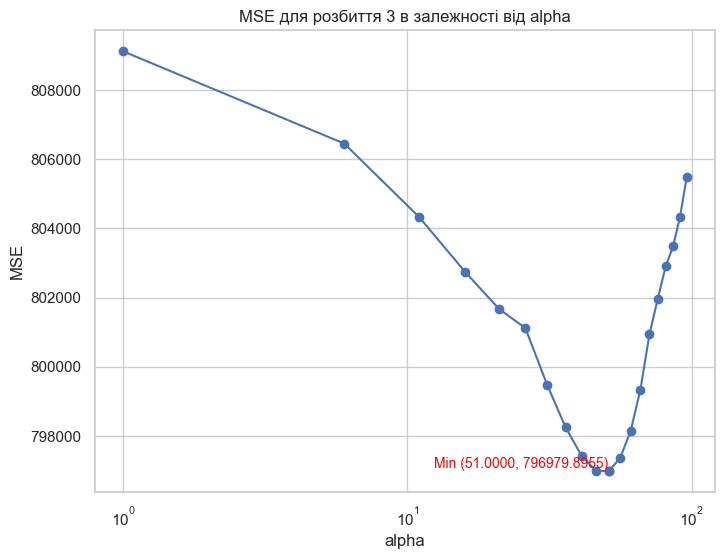

In [58]:
min_mse_indices = np.argmin(regressor.mse_path_, axis=0)
best_alphas = regressor.alphas_[min_mse_indices]

best_mse = np.min(regressor.mse_path_, axis=0)

print("Alphas with minimum MSE:")
for i, alpha in enumerate(best_alphas):
    print(f"Alpha = {alpha}, MSE = {best_mse[i]}")

for i in range(3):
    plt.figure(figsize=(8, 6))
    plt.plot(regressor.alphas_, regressor.mse_path_[:, i], marker='o')
    plt.xscale('log')  # Використовуємо логарифмічну шкалу для alpha
    plt.title(f'MSE для розбиття {i + 1} в залежності від alpha')
    plt.xlabel('alpha')
    plt.ylabel('MSE')
    plt.grid(True)

    min_mse_value = regressor.mse_path_[min_mse_indices[i], i]
    min_alpha = regressor.alphas_[min_mse_indices[i]]
    plt.scatter(min_alpha, min_mse_value, color='red')  # Червоний маркер для мінімуму
    plt.text(min_alpha, min_mse_value, f'Min ({min_alpha:.4f}, {min_mse_value:.4f})', 
             color='red', fontsize=10, verticalalignment='bottom', horizontalalignment='right')

    plt.show()

# Завдання 10

## Завдання 1
В останній навченій моделі виберіть 4 ознаки з найбільшими (позитивними) коефіцієнтами (і випишіть їх), подивіться на візуалізації залежностей cnt від цих ознак, які ми зображали у блоці "Ознайомлення з даними". Чи видно зростаючу лінійну залежність cnt від цих ознак за графіками? Чи логічно стверджувати (виходячи зі здорового глузду), що чим більше значення цих ознак, тим більше людей захочуть взяти велосипеди?

In [113]:
def plot_cnt_dependence(list):
    for feature, coef in list:
        plt.figure(figsize=(8, 5))
        plt.scatter(df[feature], df['cnt'], alpha=0.5)
        plt.title(f"Залежність cnt від {feature}")
        plt.xlabel(feature)
        plt.ylabel('cnt')
        plt.grid(True)
        plt.show()

In [111]:
for feature, weight in zip(df.columns, regressor.coef_):
  print(f"{feature}: {weight}")

top_4_positive_features = coefficients.argsort()[8:]
top_positive_features = [(df.columns[i], coefficients[i]) for i in top_4_positive_features]

season: 532.0189828413528
yr: 1015.0602226430599
mnth: -100.0395261435658
holiday: -83.29395987529907
weekday: 132.504465490958
workingday: 51.55708561407365
weathersit: -330.5598567399813
temp: 370.67985503003223
atemp: 581.3969310655003
hum: -140.00740550068892
windspeed(mph): -191.77140847135007
windspeed(ms): -2.6855136533159504e-08


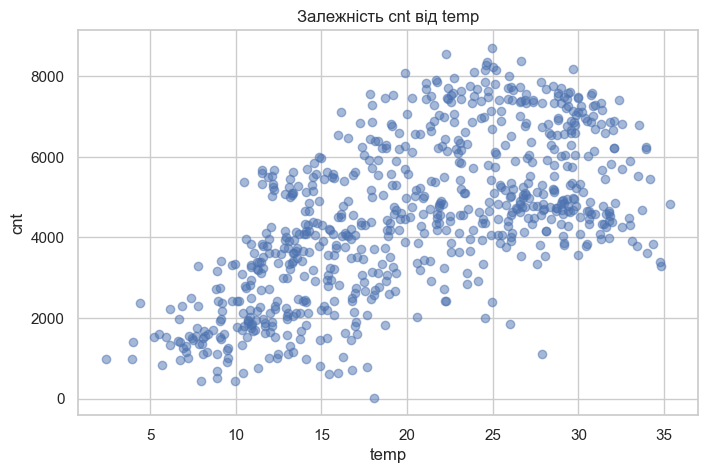

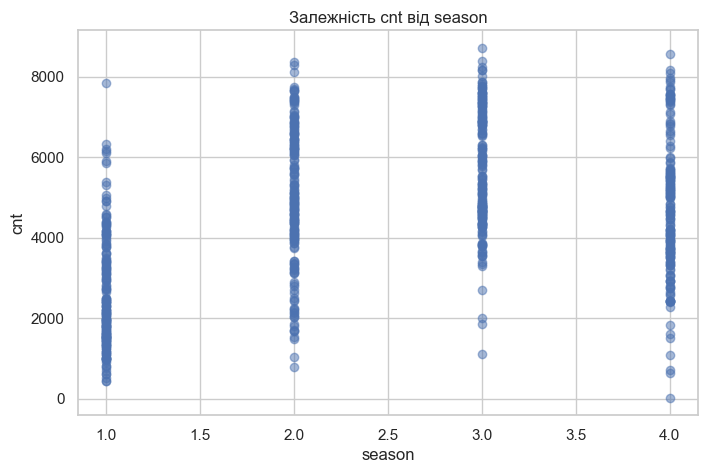

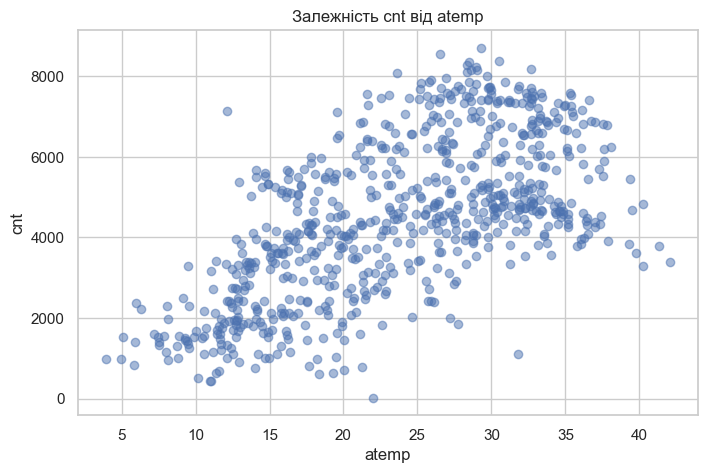

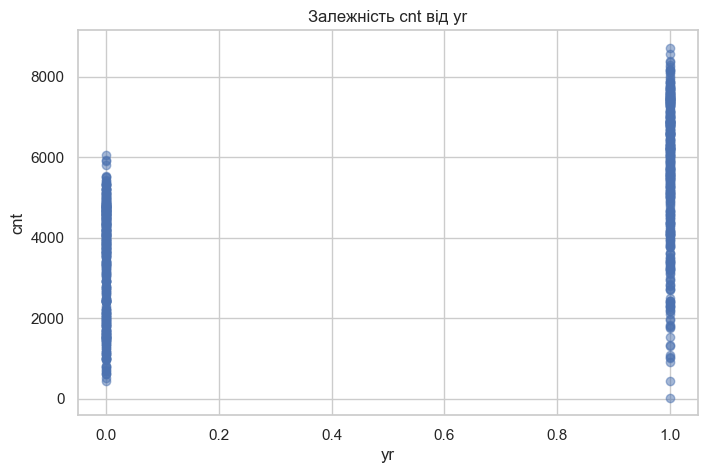

In [114]:
plot_cnt_dependence(top_positive_features)

### Відповідь:
4 ознаки з найбільшими (позитивними) коефіцієнтами: year, atemp, season, temp. Для температури (temp) видно чітку зростаючу лінінйу залежність, чим вища температура, тим більше людей орендують велосипеди. Аналогічно з atemp. Для season помітна закономірність, що певний місяць має вплив на кулькість аренд. Для другого року можна побачити,

## Завдання 2
Виберіть 3 ознаки з найбільшими за модулем негативними коефіцієнтами (і випишіть їх), подивіться на відповідні візуалізації. Чи видно лінійну залежність, що зменшується? Чи логічно стверджувати, що чим більша величина цих ознак, тим менше людей захочуть взяти велосипеди?

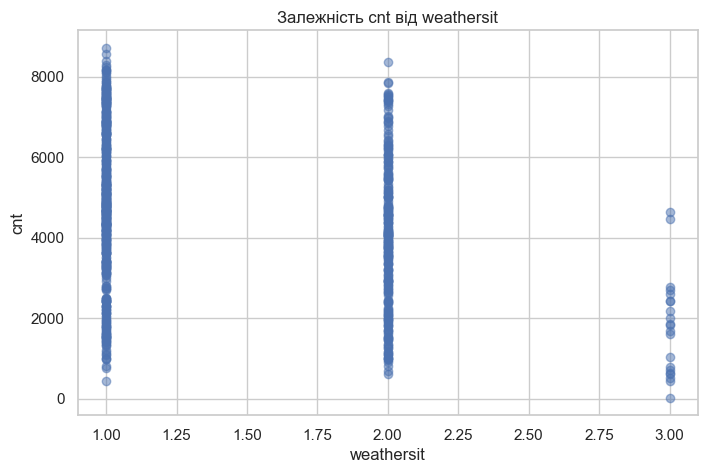

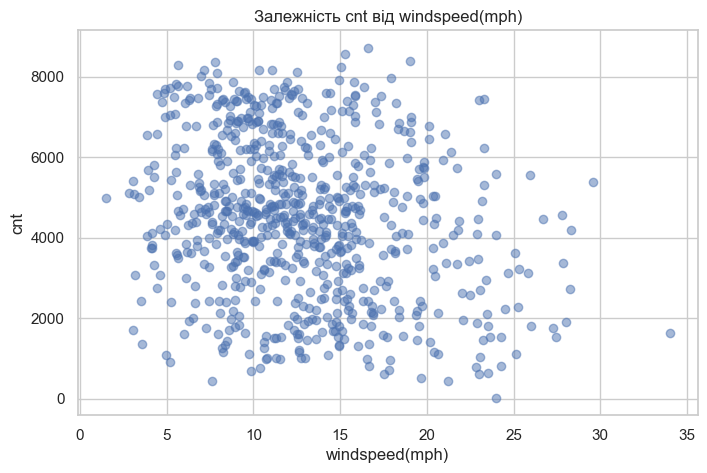

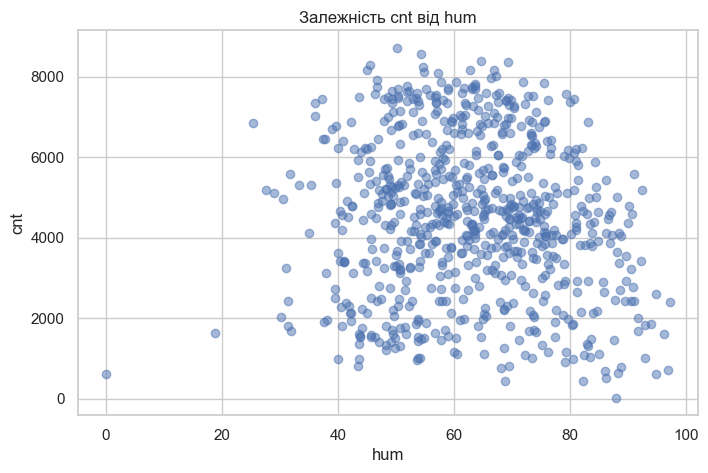

In [116]:
negative_coefficients = coefficients[coefficients < 0]
top_3_negative_features = coefficients.argsort()[:3]

top_negative_features = [(df.columns[i], coefficients[i]) for i in top_3_negative_features]
plot_cnt_dependence(top_negative_features)

### Відповідь:
3 ознаки з найбільшими за модулем негативними коефіцієнтами: weathersit, windspeed (mph), hum. Для першої ознаки видно спадну залежність, чим сильніший вітер, тим менше людей готові користуватися велосипедами. Для другої також наявна лінійна залежність, бо погана погода зменшує попит. Для останньої можна помітити тенденцію до зниження кількості прокатів із ростом вологості, отже наявна лінійна залежність.

## Завдання 3
Випишіть ознаки з коефіцієнтами, близькими до нуля (< 1e-3). Як ви думаєте, чому модель виключила їх із моделі (знову подивіться на графіки)? Чи правда, що вони ніяк не впливають на попит на велосипеди?

In [121]:
data = pd.DataFrame(regressor.coef_, index=df.columns[:-1], columns=["coef"])

data[data.abs() < 1e-03].dropna()

,coef
windspeed(ms),-2.685514e-08


### Відповідь:
Ознака близька до нуля - windspeed(ms). Ця ознака демонструє низьку кореляцію з кількістю орендованих велосипедів (cnt), а отже слабко впливає на цільову змінну.